In [21]:
import os
import csv
import numpy as np
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

In [79]:
def sizeof_fmt(num, suffix="B"):
    for unit in ["", "Ki", "Mi", "Gi", "Ti", "Pi", "Ei", "Zi"]:
        if abs(num) < 1024.0:
            return f"{num:3.1f}{unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f}Yi{suffix}"

        size  lifetime
0          5  0.000000
1         12  0.000000
2        171  0.000000
3          2  0.000000
4         32  0.000000
...      ...       ...
236851   504  0.000109
236852  2984  0.199577
236853  2984  0.999645
236854  2984  0.999644
236855  2984  0.999644

[236856 rows x 2 columns]


/tmp/ipykernel_984672/4259801268.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([sizeof_fmt(x) for x in vals])


[Text(0.0625, 0, '0.1B'),
 Text(1.0, 0, '1.0B'),
 Text(16.0, 0, '16.0B'),
 Text(256.0, 0, '256.0B'),
 Text(4096.0, 0, '4.0KiB'),
 Text(65536.0, 0, '64.0KiB'),
 Text(1048576.0, 0, '1.0MiB'),
 Text(16777216.0, 0, '16.0MiB'),
 Text(268435456.0, 0, '256.0MiB'),
 Text(4294967296.0, 0, '4.0GiB'),
 Text(68719476736.0, 0, '64.0GiB')]

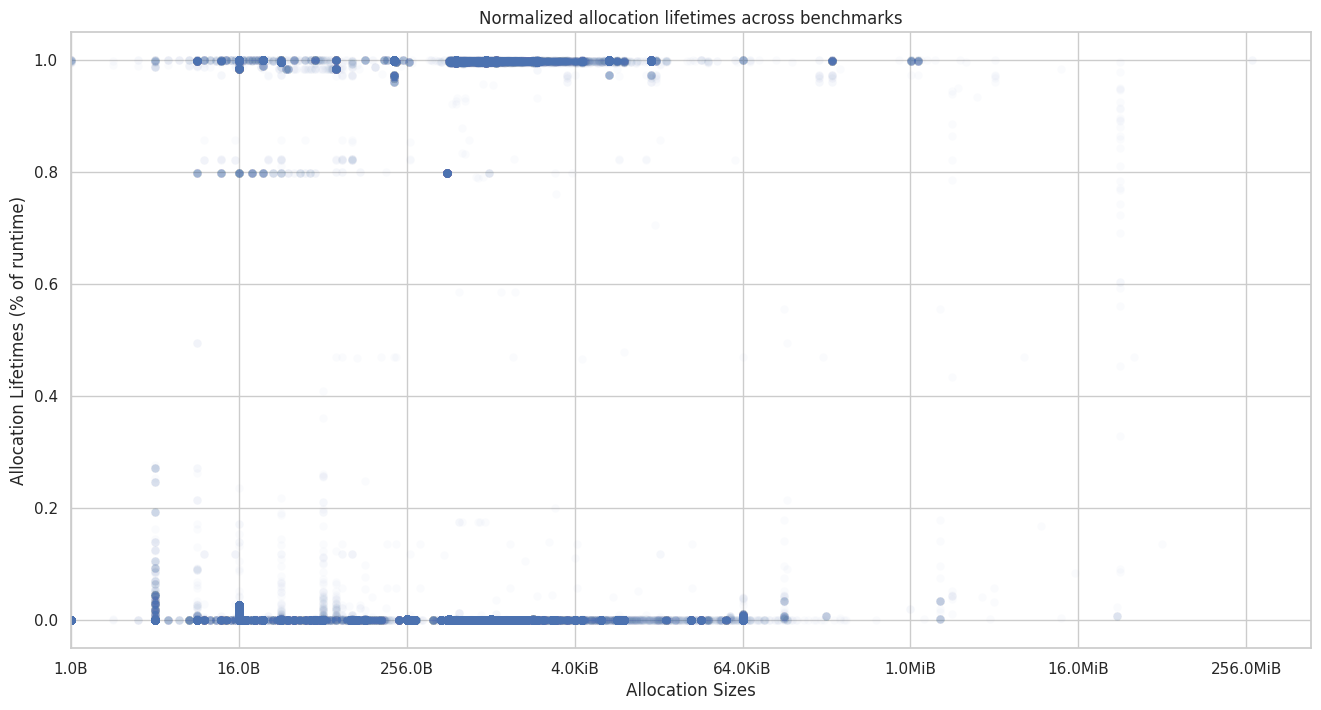

In [140]:
df = pd.read_csv('/tmp/lifetimes', header=None, names=["size", "lifetime"])
print(df)
f, ax = plt.subplots(1, figsize=(8 * 2, 4 * 2))
# df['lifetime'] *= 100

# sns.set_theme(style="whitegrid")
# sns.despine(f, left=True, bottom=True)
g = sns.scatterplot(df, x="size", y="lifetime", ax=ax, sizes=(1, 2), linewidth=0, alpha=0.025)
g.set(xlabel="Allocation Sizes", ylabel = "Allocation Lifetimes (% of runtime)", title ='Normalized allocation lifetimes across benchmarks')
plt.xscale('log', base=2)
# plt.yscale('log', base=2)
ax.set_xlim(1, None)

# ticks_loc = ax.get_xticks().tolist()
# ax.set_xticks(ax.get_xticks().tolist())
# ax.set_xticklabels([sizeof_fmt(x) for x in ticks_loc])

vals = ax.get_xticks()
ax.set_xticklabels([sizeof_fmt(x) for x in vals])

/tmp/ipykernel_984672/594810601.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([sizeof_fmt(x) for x in vals])


[Text(0.25, 0, '0.2B'),
 Text(1.0, 0, '1.0B'),
 Text(4.0, 0, '4.0B'),
 Text(16.0, 0, '16.0B'),
 Text(64.0, 0, '64.0B'),
 Text(256.0, 0, '256.0B'),
 Text(1024.0, 0, '1.0KiB'),
 Text(4096.0, 0, '4.0KiB'),
 Text(16384.0, 0, '16.0KiB')]

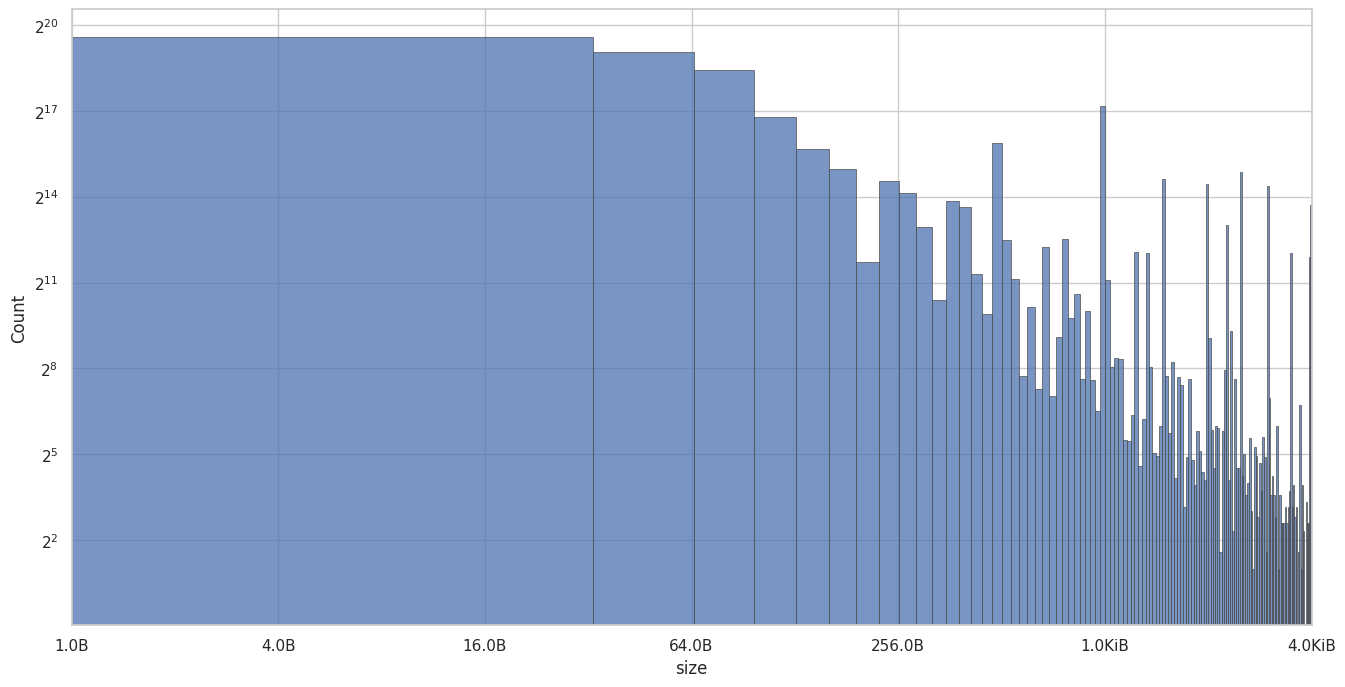

In [138]:
f, ax = plt.subplots(1, figsize=(8 * 2, 4 * 2))
sns.histplot(
    df,
    x="size",
    edgecolor=".3",
    linewidth=.5,
    binwidth=32,
    # bins=64,
    # log_scale=True,
    ax=ax
)
plt.xscale('log', base=2)
plt.yscale('log', base=2)
ax.set_xlim(1, 4096)
vals = ax.get_xticks()
ax.set_xticklabels([sizeof_fmt(x) for x in vals])
